In [533]:
import pandas as pd
import numpy as np

In [534]:
data = pd.read_excel("/kaggle/input/cars-vf/Cars_VF.xlsx", engine='openpyxl')
data.head()


,Marque,Modèle,Kilométrage,Carburant,Boite Vitesse,Puissance Fiscale,Carrosserie,Année,Prix,Mise en circulation
0,Renault,Capture,121000,Essence,Manuelle,5.0,Autres,2019,43000DT,NaN
1,Seat,Ibiza,97000,Essence,Manuelle,4.0,Compacte,2018,43500DT,NaN
2,Mercedes-Benz,Classe A,135000,Diesel,Automatique,6.0,Compacte,2019,93000DT,NaN
3,Peugeot,Expert,154000,Diesel,Manuelle,5.0,Utilitaire,2019,57000DT,NaN
4,Mercedes-Benz,207D,0,Diesel,Manuelle,0.0,Autres,1981,10000DT,NaN


In [535]:
display(data)

,Marque,Modèle,Kilométrage,Carburant,Boite Vitesse,Puissance Fiscale,Carrosserie,Année,Prix,Mise en circulation
0,Renault,Capture,121000,Essence,Manuelle,5.0,Autres,2019,43000DT,NaN
1,Seat,Ibiza,97000,Essence,Manuelle,4.0,Compacte,2018,43500DT,NaN
2,Mercedes-Benz,Classe A,135000,Diesel,Automatique,6.0,Compacte,2019,93000DT,NaN
3,Peugeot,Expert,154000,Diesel,Manuelle,5.0,Utilitaire,2019,57000DT,NaN
4,Mercedes-Benz,207D,0,Diesel,Manuelle,0.0,Autres,1981,10000DT,NaN
...,...,...,...,...,...,...,...,...,...,...
9668,Haval,H6,80 000km,Essence,Automatique,9cv,SUV/4x4,NaN,68 000 DT,11.20
9669,Seat,Ibiza,80 000km,Essence,Manuelle,5cv,Citadine,NaN,53 000 DT,9.20
9670,Volkswagen,Golf 7,145 000km,Essence,Manuelle,5cv,Berline,NaN,46 000 DT,6.20
9671,Chery,Tiggo 2,45 000km,Essence,Manuelle,6cv,SUV/4x4,NaN,Sous leasing 49 400 DT,5.20


In [536]:
data.shape

(9673, 10)

In [537]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9673 entries, 0 to 9672
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marque               9638 non-null   object 
 1   Modèle               9607 non-null   object 
 2   Kilométrage          9673 non-null   object 
 3   Carburant            9632 non-null   object 
 4   Boite Vitesse        9640 non-null   object 
 5   Puissance Fiscale    9579 non-null   object 
 6   Carrosserie          9565 non-null   object 
 7   Année                6198 non-null   object 
 8   Prix                 9673 non-null   object 
 9   Mise en circulation  3421 non-null   float64
dtypes: float64(1), object(9)
memory usage: 755.8+ KB


**Creating backup copy**

In [538]:
backup=data.copy()

# **Quality**


* remarque 1 
* remarque 2 
* remarque 3
*  ...........

# **cleaning data**

# **'Prix' column**

In [539]:
# Supprimer les espaces dans la colonne 'Prix'
data['Prix'] = data['Prix'].str.replace(' ', '')

# Remplacer 'DT' par '' dans la colonne 'Prix'
data['Prix'] = data['Prix'].str.replace('DT', '')

# Convertir la colonne en type numérique (si les valeurs sont numériques)
data['Prix'] = pd.to_numeric(data['Prix'], errors='coerce')

# Supprimer les lignes avec des valeurs non numériques dans la colonne 'Prix'
data.dropna(subset=['Prix'], inplace=True)

# Convertir les valeurs restantes en entiers
data['Prix'] = data['Prix'].astype(int)

In [540]:
data = data[(data['Prix'] <= 800000)]

In [541]:
data['Prix'].info()

<class 'pandas.core.series.Series'>
Index: 9620 entries, 0 to 9672
Series name: Prix
Non-Null Count  Dtype
--------------  -----
9620 non-null   int64
dtypes: int64(1)
memory usage: 150.3 KB


In [542]:
data['Prix'].unique()

array([ 43000,  43500,  93000,  57000,  10000,  29000,  49500,  39500,
        36800,  24000,  27000,  84000,  74000,  14500, 140000,  18800,
        19500, 285000,   9000,  11500,  15000,  23500,   9800,  12500,
        35000,  42500,  47000,  65000,  31000,  54000,  37800,  32000,
        44800,  30900,  28000,  91000,  15500,  41000,  42000,  49000,
       200000,  98000,  38800, 190000,  50900,  39800,  27500,  85000,
        23000,  33000,  31500, 101200,  41499,  18500,  38000,  77000,
        59000,  79500,  33500,  34000,  46500,   8500,  41500,  46000,
        34800,  67000, 125000,  22000,  52000,  16500,  70000,  36500,
        37000,  40000,  34700,  19000,  22500,  48000,  52500,  38500,
        44500,  16000,  34500,  50000,  82000,  36000,  29500,  78000,
       123456,  95000,  55000,  47498,  45000,  60000,  30500,   6500,
        20000,  62000,  66000,  71000, 215000,  92000,  13000,  26500,
        26900,  21900,  32799,  30000,  21000, 173000,  17500,  10500,
      

# "kilometrage" column

In [543]:
# Supprimer les espaces 
data['Kilométrage'] = data['Kilométrage'].str.replace(' ', '')

# Remplacer 'DT' par ''
data['Kilométrage'] = data['Kilométrage'].str.replace('km', '')

# Convertir la colonne en type numérique (si les valeurs sont numériques)
data['Kilométrage'] = pd.to_numeric(data['Kilométrage'], errors='coerce')

# Supprimer les lignes avec des valeurs non numériques 
data.dropna(subset=['Kilométrage'], inplace=True)

# Convertir les valeurs restantes en entiers
data['Kilométrage'] = data['Kilométrage'].astype(int)


In [544]:
# Drop rows with 'Kilometrage' values larger than 10,000,000 and less than 1,000
data = data[(data['Kilométrage'] <= 10000000) & (data['Kilométrage'] >= 1000)]

In [545]:
data['Kilométrage'].unique()

array([ 121000,   97000,  135000,  154000,    1000,  130000,  180000,
         41500,  226000,   80000,  120000,   74000,  348000,   82000,
         76000,  500000,  137000,   73500,   67000,  203000,   48000,
         40000,   80500,  100000,   56250,  240000,   53000,  125000,
        210000,  110000,   90000,  236000,  122366,   70500,   87000,
        143000,  220000,  126000,   83000,  105000,  123321,   57500,
         62000,   84000,   39000,   18750,  405000,   78500,  157000,
        150000,  187000,   63000,  145000,   21000,  103000,  250000,
        623000,  217000,  234000,   21400,  212000,  141000,  148000,
        320000,  369000,  215000,  230000,   52000,   51000,  197000,
         43000,  155000,   72000,   98000,   73290,  183000,   74086,
        142000,  300000,   99500,   99000,  144000,   64000,  117000,
        147000,   49000,  169000,   47000,   81000,  200500,  181800,
        206000,  280000,  228000,  445000,  270000,  176000,  170000,
         60000,  101

# "Puissance Fiscale" column

In [546]:
# Supprimer "cv" de toutes les valeurs de la colonne 'Puissance Fiscale'
data['Puissance Fiscale'] = data['Puissance Fiscale'].str.replace('cv', '')

In [547]:
# Convertir les valeurs en type float
data['Puissance Fiscale'] = pd.to_numeric(data['Puissance Fiscale'], errors='coerce')

In [548]:
# Eliminer les valeurs nulles ou inférieures à 0
data = data[data['Puissance Fiscale'] > 4]

In [549]:
# Eliminer les valeurs supérieures à  150
data = data[data['Puissance Fiscale'] <= 100]

In [550]:
# Convertir les valeurs en type int
data['Puissance Fiscale'] = data['Puissance Fiscale'].astype(int)

In [551]:
data['Puissance Fiscale'].unique()

array([ 5,  6,  7,  9, 36, 10, 11,  8, 84, 12, 15, 18, 16, 31, 17, 13, 24,
       20, 21, 65, 80, 28, 19, 67, 27, 85, 14, 44, 69, 23, 22, 70,  4, 25,
       55, 43, 30, 66, 26, 68, 81, 29, 33, 32, 47])

# "Cylindrée" column

# might drop it khater madem aandi puiss fiscale maatch hachti bih w zid fazet l convertion

# "mise en circ" and "Année" 

In [552]:
display(data)

,Marque,Modèle,Kilométrage,Carburant,Boite Vitesse,Puissance Fiscale,Carrosserie,Année,Prix,Mise en circulation
0,Renault,Capture,121000,Essence,Manuelle,5,Autres,2019,43000,NaN
2,Mercedes-Benz,Classe A,135000,Diesel,Automatique,6,Compacte,2019,93000,NaN
3,Peugeot,Expert,154000,Diesel,Manuelle,5,Utilitaire,2019,57000,NaN
5,Citroen,C4,1000,Essence,Manuelle,6,Berline,2013,29000,NaN
6,Volkswagen,Polo,130000,Essence,Manuelle,5,Berline,2021,49500,NaN
...,...,...,...,...,...,...,...,...,...,...
9667,Peugeot,2008,92000,Essence,Manuelle,5,SUV/4x4,NaN,45000,6.20
9668,Haval,H6,80000,Essence,Automatique,9,SUV/4x4,NaN,68000,11.20
9669,Seat,Ibiza,80000,Essence,Manuelle,5,Citadine,NaN,53000,9.20
9670,Volkswagen,Golf 7,145000,Essence,Manuelle,5,Berline,NaN,46000,6.20


In [553]:
data['Mise en circulation'].unique()

array([    nan,  6.2018, 10.2018,  5.2019,  5.201 ,  7.2012,  1.2013,
        1.202 ,  3.2019,  3.2016, 12.2022,  6.2023,  8.2023,  9.2019,
        3.202 , 12.2023, 11.2022,  1.2021, 10.2019,  1.2009,  5.2014,
        8.2015, 11.2019,  6.2019,  6.2022,  8.2012,  4.201 , 10.2021,
        3.2018,  2.2017, 12.2007,  4.2022,  3.2022,  3.2013, 10.2022,
        5.2017,  7.2014,  1.2015,  4.2023, 10.2012, 11.2013,  1.2016,
       12.2016,  5.2018,  5.2022, 12.202 ,  2.2022,  1.2019, 11.2012,
        6.2021,  1.2018,  6.202 ,  9.2023,  8.202 ,  2.2016,  2.202 ,
        2.2019,  2.2018, 11.2021,  6.2009, 10.2017, 12.2009,  8.2017,
        9.2013, 11.202 ,  4.2014,  8.2022,  9.2014,  7.2015,  9.2012,
        8.2008,  8.2013,  3.2021,  8.2018,  1.201 , 12.2018,  9.2021,
        2.2012, 12.2019,  6.2015,  5.202 ,  1.2022,  8.2019,  9.202 ,
        2.2013,  1.2012, 10.2013,  5.2013,  7.2013,  9.2018,  4.2021,
        2.2021,  8.2007,  8.201 ,  6.2016,  6.2012, 11.2018,  7.201 ,
        5.2003,  4.2

In [554]:
data["Année"].unique()

array(['2019', '2013', '2021', '2016', '2010', '2018', '2017', '2015',
       '2000', '2014', '2020', '2022', '2009', '2011', '2004', '1993',
       nan, '2006', '2023', '2007', '20', '2008', '2005', '2012', '2024',
       '2001', '2003', '1998', '1997', '1994', '1989', '1995', '1988',
       '1999', '1996', '45', '1984', '3.2014', '1992', '1985', '2002',
       '1991', '87', '1987', '1982', '20225', '1990', '98', '20197',
       '20028', '5', '1', '07.2019', '8.2016', '20205', '02.2019',
       '2011.0', '1953', '12.2018', '11.2019', '21012', '2015.0', '20114',
       '1961', '2018.0', '2017.0', '05.2011', '13', '092021', '2030',
       '2007.0', '135000', '95', '2014.0', '00000', '03.2019', '20175',
       '2006.0', '02.2021'], dtype=object)

In [555]:
# Loop through each row and apply transformations
for index, row in data.iterrows():
    if pd.isnull(row['Année']) and not pd.isnull(row['Mise en circulation']):
        # Case 2: Extract year from 'mise en circulation' and assign to 'Année'
        year = str(row['Mise en circulation'])
        data.at[index, 'Année'] = year
    elif pd.isnull(row['Année']) and pd.isnull(row['Mise en circulation']):
        # Case 3: Drop the row if both 'Année' and 'mise en circulation' are empty
        data.drop(index, inplace=True)

# Drop the column 'mise en circulation'
data.drop(columns=['Mise en circulation'], inplace=True)


In [556]:
display(data)

,Marque,Modèle,Kilométrage,Carburant,Boite Vitesse,Puissance Fiscale,Carrosserie,Année,Prix
0,Renault,Capture,121000,Essence,Manuelle,5,Autres,2019,43000
2,Mercedes-Benz,Classe A,135000,Diesel,Automatique,6,Compacte,2019,93000
3,Peugeot,Expert,154000,Diesel,Manuelle,5,Utilitaire,2019,57000
5,Citroen,C4,1000,Essence,Manuelle,6,Berline,2013,29000
6,Volkswagen,Polo,130000,Essence,Manuelle,5,Berline,2021,49500
...,...,...,...,...,...,...,...,...,...
9667,Peugeot,2008,92000,Essence,Manuelle,5,SUV/4x4,6.2015,45000
9668,Haval,H6,80000,Essence,Automatique,9,SUV/4x4,11.2017,68000
9669,Seat,Ibiza,80000,Essence,Manuelle,5,Citadine,9.202,53000
9670,Volkswagen,Golf 7,145000,Essence,Manuelle,5,Berline,6.2013,46000


In [557]:
data["Année"].unique()

array(['2019', '2013', '2021', '2016', '2010', '2018', '2017', '2015',
       '2000', '2014', '2020', '2022', '2009', '2011', '2004', '1993',
       '2006', '2023', '2007', '20', '2008', '2005', '2012', '2024',
       '2001', '2003', '1998', '1997', '1994', '1989', '1995', '1988',
       '1999', '1996', '45', '1984', '3.2014', '1992', '1985', '2002',
       '1991', '87', '1987', '1982', '20225', '1990', '98', '20197',
       '20028', '5', '1', '07.2019', '8.2016', '20205', '02.2019',
       '2011.0', '1953', '12.2018', '11.2019', '21012', '2015.0', '20114',
       '1961', '2018.0', '2017.0', '05.2011', '13', '092021', '2030',
       '2007.0', '135000', '95', '2014.0', '00000', '03.2019', '20175',
       '2006.0', '02.2021', '6.2018', '10.2018', '5.2019', '5.201',
       '7.2012', '1.2013', '1.202', '3.2019', '3.2016', '12.2022',
       '6.2023', '8.2023', '9.2019', '3.202', '12.2023', '11.2022',
       '1.2021', '10.2019', '1.2009', '5.2014', '8.2015', '6.2019',
       '6.2022', '8.201

In [558]:
# Define a lambda function to split the string and select the second part
split_second_part = lambda x: x.split('.')[1] if '.' in x else x

# Apply the lambda function to the 'Année' column
data['Année'] = data['Année'].apply(split_second_part)


In [559]:
# Replace empty strings with NaN
data.replace({'Année': ''}, np.nan, inplace=True)

# Drop rows where 'Année' is empty (NaN)
data.dropna(inplace=True)

In [560]:
# Convert the "Année" column to integers
data['Année'] = data['Année'].astype(int)

# Filter the years between 1000 and 2025
data = data[(data['Année'] >= 1000) & (data['Année'] <= 2025)]

In [561]:
data["Année"].unique()

array([2019, 2013, 2021, 2016, 2010, 2018, 2017, 2015, 2000, 2014, 2020,
       2022, 2009, 2011, 2004, 1993, 2006, 2023, 2007, 2008, 2005, 2012,
       2024, 2001, 2003, 1998, 1997, 1994, 1989, 1995, 1988, 1999, 1996,
       1984, 1992, 1985, 2002, 1991, 1987, 1982, 1990, 1953, 1961, 1972])

In [562]:
data.shape

(6784, 9)

In [563]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6784 entries, 0 to 9672
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Marque             6784 non-null   object
 1   Modèle             6784 non-null   object
 2   Kilométrage        6784 non-null   int64 
 3   Carburant          6784 non-null   object
 4   Boite Vitesse      6784 non-null   object
 5   Puissance Fiscale  6784 non-null   int64 
 6   Carrosserie        6784 non-null   object
 7   Année              6784 non-null   int64 
 8   Prix               6784 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 530.0+ KB


In [564]:
display(data)

,Marque,Modèle,Kilométrage,Carburant,Boite Vitesse,Puissance Fiscale,Carrosserie,Année,Prix
0,Renault,Capture,121000,Essence,Manuelle,5,Autres,2019,43000
2,Mercedes-Benz,Classe A,135000,Diesel,Automatique,6,Compacte,2019,93000
3,Peugeot,Expert,154000,Diesel,Manuelle,5,Utilitaire,2019,57000
5,Citroen,C4,1000,Essence,Manuelle,6,Berline,2013,29000
6,Volkswagen,Polo,130000,Essence,Manuelle,5,Berline,2021,49500
...,...,...,...,...,...,...,...,...,...
9666,Ssangyong,Actyon Sports,200000,Diesel,Manuelle,7,Pick up,2018,50000
9667,Peugeot,2008,92000,Essence,Manuelle,5,SUV/4x4,2015,45000
9668,Haval,H6,80000,Essence,Automatique,9,SUV/4x4,2017,68000
9670,Volkswagen,Golf 7,145000,Essence,Manuelle,5,Berline,2013,46000


# **clean data**

In [565]:
data

,Marque,Modèle,Kilométrage,Carburant,Boite Vitesse,Puissance Fiscale,Carrosserie,Année,Prix
0,Renault,Capture,121000,Essence,Manuelle,5,Autres,2019,43000
2,Mercedes-Benz,Classe A,135000,Diesel,Automatique,6,Compacte,2019,93000
3,Peugeot,Expert,154000,Diesel,Manuelle,5,Utilitaire,2019,57000
5,Citroen,C4,1000,Essence,Manuelle,6,Berline,2013,29000
6,Volkswagen,Polo,130000,Essence,Manuelle,5,Berline,2021,49500
...,...,...,...,...,...,...,...,...,...
9666,Ssangyong,Actyon Sports,200000,Diesel,Manuelle,7,Pick up,2018,50000
9667,Peugeot,2008,92000,Essence,Manuelle,5,SUV/4x4,2015,45000
9668,Haval,H6,80000,Essence,Automatique,9,SUV/4x4,2017,68000
9670,Volkswagen,Golf 7,145000,Essence,Manuelle,5,Berline,2013,46000


In [566]:
data.describe(include='all')

,Marque,Modèle,Kilométrage,Carburant,Boite Vitesse,Puissance Fiscale,Carrosserie,Année,Prix
count,6784,6784,6784.00,6784,6784,6784.00,6784,6784.00,6784.00
unique,66,496,NaN,8,2,NaN,11,NaN,NaN
top,Volkswagen,Classe C,NaN,Essence,Manuelle,NaN,Berline,NaN,NaN
freq,807,225,NaN,4933,3956,NaN,2155,NaN,NaN
mean,NaN,NaN,150273.28,NaN,NaN,7.82,NaN,2015.01,69386.41
std,NaN,NaN,220311.54,NaN,NaN,5.24,NaN,6.22,57956.09
min,NaN,NaN,1000.00,NaN,NaN,4.00,NaN,1953.00,5100.00
25%,NaN,NaN,76000.00,NaN,NaN,5.00,NaN,2012.00,34500.00
50%,NaN,NaN,126000.00,NaN,NaN,7.00,NaN,2017.00,52000.00
75%,NaN,NaN,190000.00,NaN,NaN,8.00,NaN,2019.00,85000.00


In [567]:
data.to_csv('Cleaned_Car_data_v1.csv',index=False)

In [568]:
clean_data = pd.read_csv("/kaggle/working/Cleaned_Car_data_v1.csv")
clean_data.head()


,Marque,Modèle,Kilométrage,Carburant,Boite Vitesse,Puissance Fiscale,Carrosserie,Année,Prix
0,Renault,Capture,121000,Essence,Manuelle,5,Autres,2019,43000
1,Mercedes-Benz,Classe A,135000,Diesel,Automatique,6,Compacte,2019,93000
2,Peugeot,Expert,154000,Diesel,Manuelle,5,Utilitaire,2019,57000
3,Citroen,C4,1000,Essence,Manuelle,6,Berline,2013,29000
4,Volkswagen,Polo,130000,Essence,Manuelle,5,Berline,2021,49500


In [569]:
display(clean_data)

,Marque,Modèle,Kilométrage,Carburant,Boite Vitesse,Puissance Fiscale,Carrosserie,Année,Prix
0,Renault,Capture,121000,Essence,Manuelle,5,Autres,2019,43000
1,Mercedes-Benz,Classe A,135000,Diesel,Automatique,6,Compacte,2019,93000
2,Peugeot,Expert,154000,Diesel,Manuelle,5,Utilitaire,2019,57000
3,Citroen,C4,1000,Essence,Manuelle,6,Berline,2013,29000
4,Volkswagen,Polo,130000,Essence,Manuelle,5,Berline,2021,49500
...,...,...,...,...,...,...,...,...,...
6779,Ssangyong,Actyon Sports,200000,Diesel,Manuelle,7,Pick up,2018,50000
6780,Peugeot,2008,92000,Essence,Manuelle,5,SUV/4x4,2015,45000
6781,Haval,H6,80000,Essence,Automatique,9,SUV/4x4,2017,68000
6782,Volkswagen,Golf 7,145000,Essence,Manuelle,5,Berline,2013,46000


DATA EVALUATION : CORRELATION / PLOTS AND RELATIONS 

# LAZY REGRESSOR TRAINING

In [570]:
!pip install lazypredict
# Import necessary libraries
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from IPython.display import display

In [571]:
clean_data.dropna(inplace=True)

In [572]:
clean_data

,Marque,Modèle,Kilométrage,Carburant,Boite Vitesse,Puissance Fiscale,Carrosserie,Année,Prix
0,Renault,Capture,121000,Essence,Manuelle,5,Autres,2019,43000
1,Mercedes-Benz,Classe A,135000,Diesel,Automatique,6,Compacte,2019,93000
2,Peugeot,Expert,154000,Diesel,Manuelle,5,Utilitaire,2019,57000
3,Citroen,C4,1000,Essence,Manuelle,6,Berline,2013,29000
4,Volkswagen,Polo,130000,Essence,Manuelle,5,Berline,2021,49500
...,...,...,...,...,...,...,...,...,...
6779,Ssangyong,Actyon Sports,200000,Diesel,Manuelle,7,Pick up,2018,50000
6780,Peugeot,2008,92000,Essence,Manuelle,5,SUV/4x4,2015,45000
6781,Haval,H6,80000,Essence,Automatique,9,SUV/4x4,2017,68000
6782,Volkswagen,Golf 7,145000,Essence,Manuelle,5,Berline,2013,46000


In [573]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Marque', 'Modèle', 'Carrosserie', 'Carburant', 'Boite Vitesse']
for col in categorical_cols:
    clean_data[col] = label_encoder.fit_transform(clean_data[col])

In [574]:
# Shuffle the dataset
data_shuffled = shuffle(clean_data, random_state=13)



In [575]:
display(data_shuffled)

,Marque,Modèle,Kilométrage,Carburant,Boite Vitesse,Puissance Fiscale,Carrosserie,Année,Prix
2413,48,20,130000,0,0,6,2,2020,97000
3204,61,441,106000,2,0,8,2,2019,91000
2655,47,71,350000,2,1,5,5,2006,24500
2452,48,34,194000,0,1,7,5,2009,22000
3409,2,53,40000,0,0,9,5,2020,148000
...,...,...,...,...,...,...,...,...,...
866,45,290,390000,0,1,10,0,2000,27000
2790,59,484,80000,2,1,6,2,2020,45000
74,43,132,183000,0,1,7,2,2009,47498
6320,61,239,112000,0,1,6,2,2019,71000


In [576]:
# Separate features and target variable
X = data_shuffled.drop(columns=["Prix"])  # Adjust target_column_name
y = data_shuffled["Prix"]  # Adjust target_column_name



In [577]:
# Convert X to float32
X = X.astype(np.float32)

# Split the dataset into train and test sets
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]



In [578]:
# Initialize LazyRegressor
reg = LazyRegressor(predictions=True, custom_metric = mean_absolute_error)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Fit LazyRegressor
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Print the models and their performance
print(models)


100%|██████████| 42/42 [00:55<00:00,  1.33s/it]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001481 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 6105, number of used features: 8
[LightGBM] [Info] Start training from score 69347.902375
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:54<00:00,  1.29s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 6105, number of used features: 8
[LightGBM] [Info] Start training from score 69347.902375
                               Adjusted R-Squared  R-Squared       RMSE  \
Model                                                                     
ExtraTreesRegressor                          0.96       0.96   11613.96   
XGBRegressor                                 0.96       0.96   11788.48   
RandomForestRegressor                        0.94       0.94   13788.50   
ExtraTreeRegressor                           0.94       0.94   13998.73   
BaggingRegressor                             0.93       0.93   15057.07   
DecisionTreeRegressor                        0.93       0.93   15335.74   
LGBMRegressor                                0.91       0

# XGBRegressor training and fitting 

In [579]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [580]:
clean_data = pd.read_csv("/kaggle/working/Cleaned_Car_data_v1.csv")
clean_data.head()

,Marque,Modèle,Kilométrage,Carburant,Boite Vitesse,Puissance Fiscale,Carrosserie,Année,Prix
0,Renault,Capture,121000,Essence,Manuelle,5,Autres,2019,43000
1,Mercedes-Benz,Classe A,135000,Diesel,Automatique,6,Compacte,2019,93000
2,Peugeot,Expert,154000,Diesel,Manuelle,5,Utilitaire,2019,57000
3,Citroen,C4,1000,Essence,Manuelle,6,Berline,2013,29000
4,Volkswagen,Polo,130000,Essence,Manuelle,5,Berline,2021,49500


In [581]:
# Encode categorical variables

categorical_cols = ['Marque', 'Modèle', 'Carrosserie', 'Carburant', 'Boite Vitesse']
encoded_value_mappings = {}

# Iterate over each categorical column
for col in categorical_cols:
    # Create a new LabelEncoder object for each column
    label_encoder = LabelEncoder()
    
    # Fit the LabelEncoder to the unique values in the column
    clean_data[col] = label_encoder.fit_transform(clean_data[col])
    
    # Store the mapping in the dictionary
    encoded_value_mappings[col] = {label: category for label, category in enumerate(label_encoder.classes_)}

def show_code_mappings(encoded_value_mappings):
    for col, mapping in encoded_value_mappings.items():
        print(f"Encoded values for column '{col}':")
        for encoded_value, categorical_label in mapping.items():
            print(f"{encoded_value}: {categorical_label}")


show the mappings : code -> previous categorical label

In [582]:
# show_code_mappings(encoded_value_mappings)

Encoded values for column 'Marque':
0: AC
1: Alfa Romeo
2: Audi
3: Autres
4: BAIC YX
5: BMW
6: BYD
7: Changhe
8: Chery
9: Chevrolet
10: Citroen
11: Citroën
12: Cupra
13: DFSK
14: DS
15: Dacia
16: Daihatsu
17: Dodge
18: Dongfeng
19: Fiat
20: Ford
21: Foton
22: GMC
23: Geely
24: Great Wall
25: Haval
26: Honda
27: Hummer
28: Hyundai
29: Infiniti
30: Isuzu
31: Iveco
32: Jaguar
33: Jeep
34: KIA
35: Kia
36: Lada
37: Land Rover
38: Lincoln
39: MG
40: Mahindra
41: Masey Ferguson
42: Mazda
43: Mercedes-Benz
44: Mini
45: Mitsubishi
46: Nissan
47: Opel
48: Peugeot
49: Porsche
50: Renault
51: Rover
52: Seat
53: Skoda
54: Smart
55: Ssangyong
56: Suzuki
57: Tata
58: Tesla
59: Toyota
60: UFO
61: Volkswagen
62: Volvo
63: lancia
64: mini
65: wallyscar
Encoded values for column 'Modèle':
0: 106
1: 156
2: 19
3: 190
4: 2
5: 2 Sedan
6: 2008
7: 2008 GT
8: 205
9: 206
10: 206+
11: 207
12: 207 SW
13: 207D
14: 208
15: 220
16: 250
17: 3
18: 3 portes
19: 3 sedan
20: 3008
21: 3008 GT
22: 301
23: 306
24: 307
25: 30

In [583]:
# Shuffle the dataset
data_shuffled = shuffle(clean_data, random_state=13)
data_shuffled.to_csv('Clean_shuffled_coded_data.csv',index=False)
data_shuffled.head()

,Marque,Modèle,Kilométrage,Carburant,Boite Vitesse,Puissance Fiscale,Carrosserie,Année,Prix
2413,48,20,130000,0,0,6,2,2020,97000
3204,61,441,106000,2,0,8,2,2019,91000
2655,47,71,350000,2,1,5,5,2006,24500
2452,48,34,194000,0,1,7,5,2009,22000
3409,2,53,40000,0,0,9,5,2020,148000


In [584]:

# Separate features and target variable
X = data_shuffled.drop(columns=["Prix"])  # Adjust target_column_name
y = data_shuffled["Prix"]  # Adjust target_column_name
# Convert X to float32
X = X.astype(np.float32)




xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.15)

In [585]:
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [586]:
xgbr.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [587]:
score = xgbr.score(xtrain, ytrain)  
print("Training score (r2_score): ", score) 

Training score (r2_score):  0.9850710249884643


In [588]:
scores = cross_val_score(xgbr, xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.91


In [589]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.90


In [590]:
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
rmse = mse ** 0.5
mape = 100 * np.mean(np.abs((ytest - ypred) / ytest))
mae = mean_absolute_error(ytest, ypred)  # Calculate Mean Absolute Error

print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("MAPE: %.2f%%" % mape)
print("MAE: %.2f" % mae)  # Print MAE without percentage sign

MSE: 164710679.39
RMSE: 12833.97
MAPE: 14.70%
MAE: 7221.92


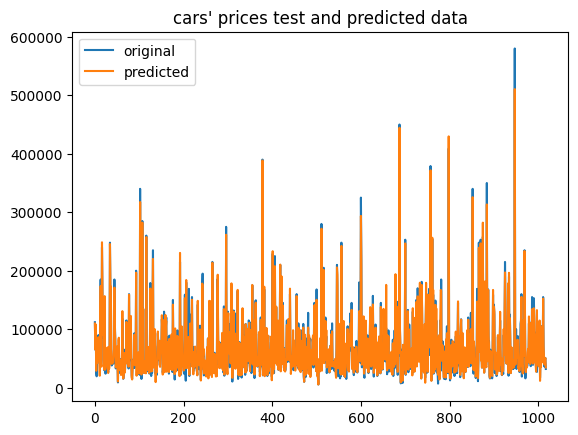

In [591]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("cars' prices test and predicted data")
plt.legend()
plt.show()

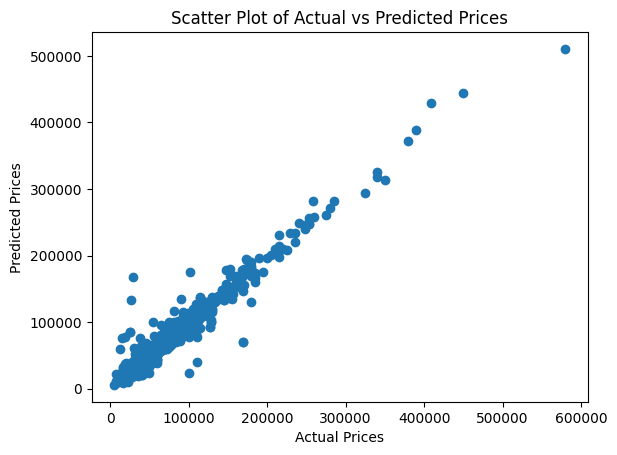

In [592]:
plt.scatter(ytest, ypred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Scatter Plot of Actual vs Predicted Prices")
plt.show()


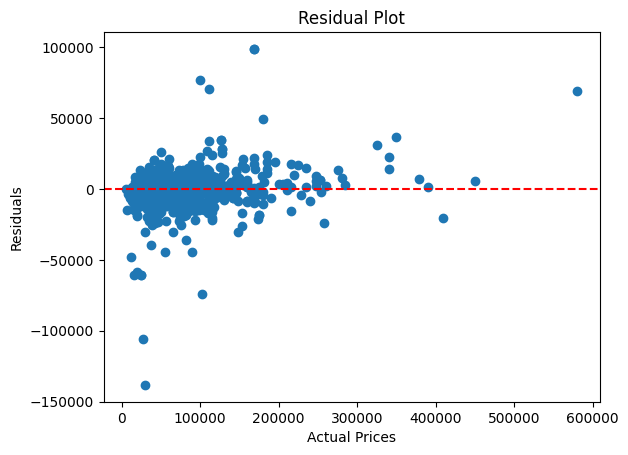

In [593]:
residuals = ytest - ypred
plt.scatter(ytest, residuals)
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.show()


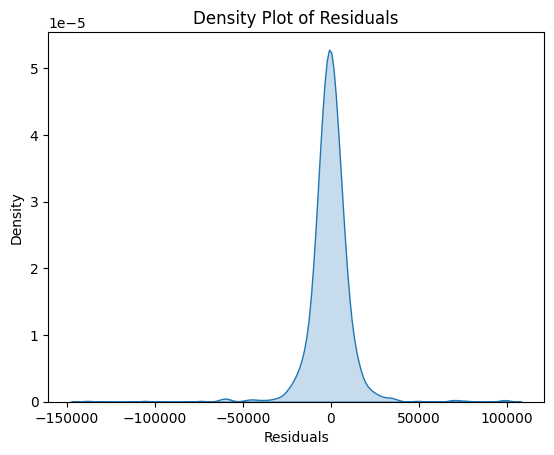

In [594]:
import seaborn as sns

sns.kdeplot(residuals, shade=True)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Density Plot of Residuals")
plt.show()


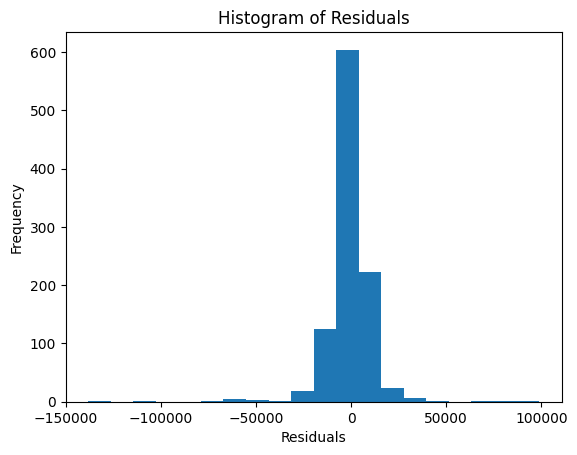

In [595]:
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()


In [596]:
# Example input data (replace this with your actual input data)
sample_input = [[52, 263,40000, 2,1,4,5,2022]]  # Format: [[feature1_value, feature2_value, ...]]

# Use the trained model to make predictions
predicted_price = xgbr.predict(sample_input)

# Print or visualize the predicted output
print("Predicted Price:", predicted_price)


Predicted Price: [50439.645]


# tawa el neural network 


In [597]:
!pip install tensorflow

In [598]:
# Tensorflow and Keras are two packages for creating neural network models.
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

# Print tensorfow (TF) version. Make sure you have at least tensorflow 2.1.0
print(f"Tensorflow version: {tf.version.VERSION}")

Tensorflow version: 2.15.0


In [599]:
# import NN layers and other componenets.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [600]:
!pip install tensorflow_docs
# Tensorflow untils packages.
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [601]:
import pathlib # for processing a path e.g., c:\documents\files\test_ds.csv
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data from for the data.
import seaborn as sns # for plotting.

In [602]:
tf.random.set_seed(13) # to make sure the experiment is reproducible.
tf.debugging.set_log_device_placement(False)


In [603]:
all_ds = pd.read_csv('/kaggle/working/Clean_shuffled_coded_data.csv')

In [604]:
all_ds.head()


,Marque,Modèle,Kilométrage,Carburant,Boite Vitesse,Puissance Fiscale,Carrosserie,Année,Prix
0,48,20,130000,0,0,6,2,2020,97000
1,61,441,106000,2,0,8,2,2019,91000
2,47,71,350000,2,1,5,5,2006,24500
3,48,34,194000,0,1,7,5,2009,22000
4,2,53,40000,0,0,9,5,2020,148000


In [605]:
print(f'Number of rows/examples and columns in the dataset: {all_ds.shape}')


Number of rows/examples and columns in the dataset: (6784, 9)


In [606]:
# Summary of information on the dataset.
all_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6784 entries, 0 to 6783
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Marque             6784 non-null   int64
 1   Modèle             6784 non-null   int64
 2   Kilométrage        6784 non-null   int64
 3   Carburant          6784 non-null   int64
 4   Boite Vitesse      6784 non-null   int64
 5   Puissance Fiscale  6784 non-null   int64
 6   Carrosserie        6784 non-null   int64
 7   Année              6784 non-null   int64
 8   Prix               6784 non-null   int64
dtypes: int64(9)
memory usage: 477.1 KB


In [607]:
# Split the data into 60% train and 40% test (later will divide the test to test and validate.)
train_dataset, temp_test_dataset =  train_test_split(all_ds, test_size=0.4)

print( train_dataset.shape )
print( temp_test_dataset.shape )

(4070, 9)
(2714, 9)


In [608]:
# Split the test_dataset dataframe to 50% test and 50% validation. [this will divide the dataset into 60% train, 20% validate, and 20% test]
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.5)
print( test_dataset.shape )
print( valid_dataset.shape )

(1357, 9)
(1357, 9)


In [609]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f" Train dataset       : {train_dataset.shape}")
print(f" Test dataset       : {test_dataset.shape}")
print(f" Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
 Train dataset       : (4070, 9)
 Test dataset       : (1357, 9)
 Validation dataset : (1357, 9)


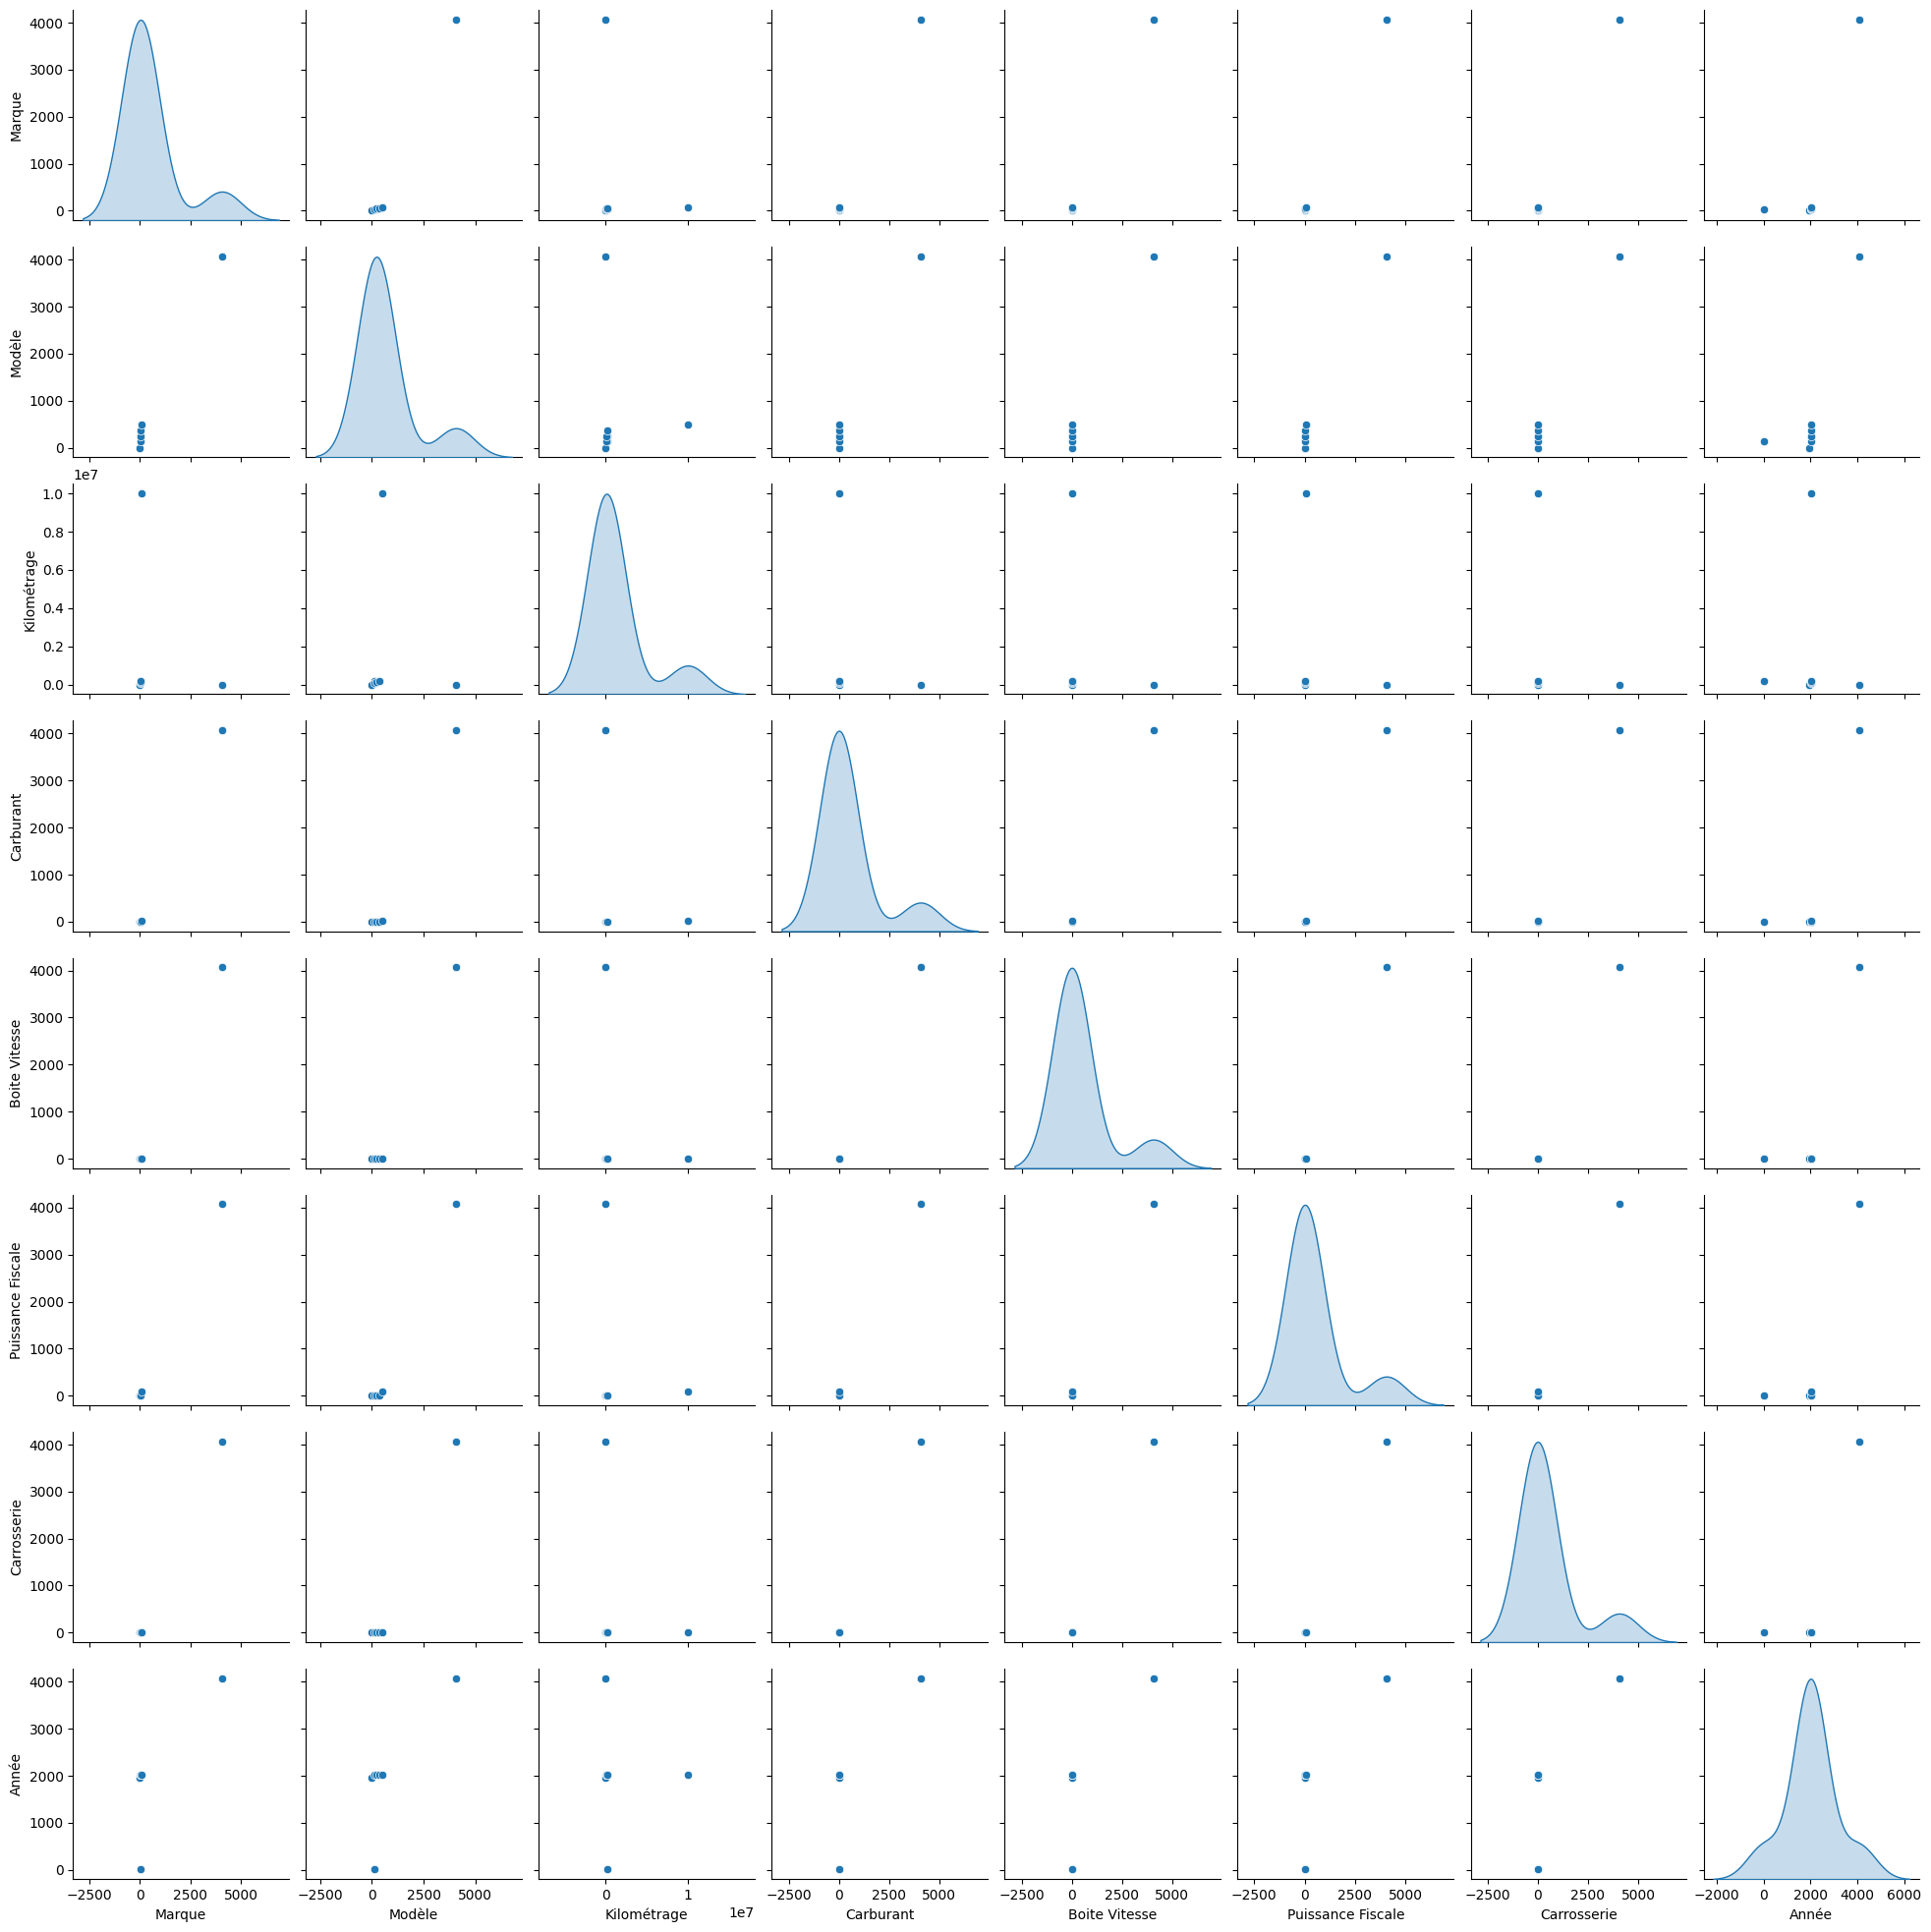

In [610]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = train_dataset.describe()
train_stats.pop("Prix")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde")

In [611]:
# Statistics on the train dataset to make sure it is in a good shape. (you may display the same stat for test and validate)
train_stats = train_dataset.describe()
train_stats.pop("Prix")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Marque,4070.00,35.53,19.26,0.00,19.00,43.00,50.00,65.00
Modèle,4070.00,241.87,134.44,0.00,132.00,239.00,361.00,495.00
Kilométrage,4070.00,148608.65,207473.67,1000.00,74000.00,124000.00,190000.00,9999999.00
Carburant,4070.00,1.54,1.03,0.00,0.00,2.00,2.00,7.00
Boite Vitesse,4070.00,0.58,0.49,0.00,0.00,1.00,1.00,1.00
Puissance Fiscale,4070.00,7.83,5.35,4.00,5.00,7.00,8.00,85.00
Carrosserie,4070.00,3.97,3.05,0.00,2.00,2.00,5.00,10.00
Année,4070.00,2015.03,6.21,1953.00,2012.00,2017.00,2019.00,2024.00


In [612]:
train_labels = train_dataset.pop('Prix')
test_labels = test_dataset.pop('Prix')
valid_labels = valid_dataset.pop('Prix')

# Data Normalization/Scaling

# Subtract the mean of the training data and divide by the standard deviation of the training data.

In [613]:
# define a function to normalize the data set.
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

# hedhi faza men mokhi naheha mbaaed ya mohamed w alka hal fel scaling khater l res mtee lfaaz li aamalha howa mateejebch 

In [614]:
# normed_train_data = train_dataset
# normed_test_data = test_dataset
# normed_valid_dataset = valid_dataset

In [644]:
# normed_train_data['Kilométrage']=normed_train_data['Kilométrage']/1000
# normed_test_data['Kilométrage']=normed_test_data['Kilométrage']/1000
# normed_valid_dataset['Kilométrage']=normed_valid_dataset['Kilométrage']/1000


train_labels=train_labels/1000
test_labels=test_labels/1000
valid_labels=valid_labels/1000


In [645]:
print(r'Train/Test/Validate splits: ')
print(f'Train    : {normed_train_data.shape} ')
print(f'Test     : {normed_test_data.shape} ')
print(f'Validate : {normed_valid_dataset.shape} ')

print(r'Train/Test/Validate labels: ')
print(f'Train Labels : {train_labels.shape} ')
print(f'Test Labels  : {test_labels.shape} ')
print(f'Test Labels  : {valid_labels.shape} ')

Train/Test/Validate splits: 
Train    : (4070, 8) 
Test     : (1357, 8) 
Validate : (1357, 8) 
Train/Test/Validate labels: 
Train Labels : (4070,) 
Test Labels  : (1357,) 
Test Labels  : (1357,) 


In [646]:
train_labels.describe()

count   4070.00
mean      69.53
std       58.57
min        5.10
25%       34.00
50%       52.00
75%       85.00
max      650.00
Name: Prix, dtype: float64

In [618]:
# show a sample of the data after normalized
normed_train_data.head(10)

,Marque,Modèle,Kilométrage,Carburant,Boite Vitesse,Puissance Fiscale,Carrosserie,Année
6748,-1.43,1.43,-0.36,0.44,0.84,-0.34,0.34,0.64
2124,-0.81,-0.16,0.73,0.44,0.84,-0.53,0.34,-0.97
5863,-0.81,0.98,-0.09,-1.50,-1.19,-0.15,-1.30,0.96
3582,0.91,0.64,-0.69,0.44,-1.19,0.03,-0.65,1.44
5803,0.54,0.89,-0.16,0.44,-1.19,-0.34,0.99,0.32
2026,-1.43,1.43,-0.42,0.44,-1.19,0.22,0.99,0.64
1015,0.86,0.41,-0.15,0.44,0.84,-0.34,0.01,0.32
6332,-0.03,0.57,0.25,-1.50,-1.19,1.72,-1.30,-0.65
1650,-0.13,0.99,-0.13,0.44,-1.19,0.03,1.65,0.48
4310,1.06,1.66,-0.32,0.44,0.84,-0.34,1.65,0.48


# Build a Neural Network Model


In [619]:
# We decalred a function for creating a model.
def build_model1_two_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 10 Neurons
    model.add(Dense(10, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.
    
    model.add(Dense(50,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 50)
        
    model.add(Dense(50,Activation('relu')))    
    
    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed
    
    return model


model = build_model1_one_hidden_layers()
print('Here is a summary of this model: ')
model.summary()

Here is a summary of this model: 
Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_289 (Dense)           (None, 10)                90        
                                                                 
 dense_290 (Dense)           (None, 50)                550       
                                                                 
 dense_291 (Dense)           (None, 50)                2550      
                                                                 
 dense_292 (Dense)           (None, 1)                 51        
                                                                 
Total params: 3241 (12.66 KB)
Trainable params: 3241 (12.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [620]:
# We decalred a function for creating a model.
def build_model2_three_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 32 Neurons
    model.add(Dense(32, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.
    
    model.add(Dense(32,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 32)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(128, Activation('relu')))                         # Hidden layer 3 => only output dimension should be designated (output dimension = # of Neurons = 128)

    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.01
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed
    
    return model

model2 = build_model2_three_hidden_layers()
print('Here is a summary of this model: ')
model2.summary()

Here is a summary of this model: 
Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_293 (Dense)           (None, 32)                288       
                                                                 
 dense_294 (Dense)           (None, 32)                1056      
                                                                 
 dense_295 (Dense)           (None, 64)                2112      
                                                                 
 dense_296 (Dense)           (None, 128)               8320      
                                                                 
 dense_297 (Dense)           (None, 1)                 129       
                                                                 
Total params: 11905 (46.50 KB)
Trainable params: 11905 (46.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________

In [674]:
# We decalred a function for creating a model.
def build_model3_five_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 32 Neurons
    model.add(Dense(64, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.
    
    model.add(Dense(128,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(128, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(128, Activation('relu')))                         # Hidden layer 3 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(128, Activation('relu')))                         # Hidden layer 4 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(128, Activation('relu')))                         # Hidden layer 5 => only output dimension should be designated (output dimension = # of Neurons = 64)

    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.000001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed
    
    return model

model3 = build_model3_five_hidden_layers()
print('Here is a summary of this model: ')
model3.summary()

Here is a summary of this model: 
Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_354 (Dense)           (None, 64)                576       
                                                                 
 dense_355 (Dense)           (None, 128)               8320      
                                                                 
 dense_356 (Dense)           (None, 128)               16512     
                                                                 
 dense_357 (Dense)           (None, 128)               16512     
                                                                 
 dense_358 (Dense)           (None, 128)               16512     
                                                                 
 dense_359 (Dense)           (None, 128)               16512     
                                                                 
 dense_360 (Dense) 

In [675]:
# pip install -q pyyaml h5py  # Required to save models in HDF5 format

checkpoint_path = "price_prediction.ckpt"

# Create a callback that saves the model's weights
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 monitor='val_loss', # or val_accuracy if you have it.
                                                 save_best_only=True, # Default false. If you don't change the file name then the output will be overritten at each step and only the last model will be saved.
                                                 save_weights_only=True, # True => model.save_weights (weights and no structure, you need JSON file for structure), False => model.save (saves weights & structure)
                                                 verbose=0,
                                                  )


# Training the model we built above.


In [676]:
%%time
EPOCHS = 500
batch_size = 36

model = build_model3_five_hidden_layers()
print('Here is a summary of this model: ')
model.summary()


with tf.device('/CPU:0'): # it can be with '/CPU:0'
# with tf.device('/GPU:0'): # comment the previous line and uncomment this line to train with a GPU, if available.
    history = model.fit(
        normed_train_data, 
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=0,
        shuffle=True,
        steps_per_epoch = int(normed_train_data.shape[0] / batch_size) ,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), 
                 ckpt_callback
                  ],
        
    )

Here is a summary of this model: 
Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_361 (Dense)           (None, 64)                576       
                                                                 
 dense_362 (Dense)           (None, 128)               8320      
                                                                 
 dense_363 (Dense)           (None, 128)               16512     
                                                                 
 dense_364 (Dense)           (None, 128)               16512     
                                                                 
 dense_365 (Dense)           (None, 128)               16512     
                                                                 
 dense_366 (Dense)           (None, 128)               16512     
                                                                 
 dense_367 (Dense) 

In [648]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
495,124.17,7.19,124.17,15.60,374.73,10.55,374.73,19.65,495
496,188.30,7.19,188.30,16.16,353.52,10.14,353.52,18.72,496
497,171.85,6.75,171.85,15.06,367.12,10.10,367.12,17.78,497
498,165.35,6.82,165.35,15.09,419.29,11.85,419.29,20.89,498
499,298.53,9.90,298.53,20.42,445.89,12.10,445.89,21.22,499


# See some of the model results


In [649]:
# normed_train_data.pop('medv')
# Test the model after training.
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

1/1 [==============================] - 0s 95ms/step
predicted values: 


array([[ 46.25943 ],
       [ 23.427559],
       [104.40782 ],
       [114.016014],
       [ 69.29046 ],
       [ 56.462364],
       [ 47.394577],
       [104.37424 ],
       [ 67.95306 ],
       [ 54.833626]], dtype=float32)

In [650]:
print('The ground truth: ')
train_labels[:10]

The ground truth: 


6748    42.00
2124    22.00
5863   127.00
3582   107.50
5803    63.00
2026    78.00
1015    62.00
6332    69.00
1650    68.00
4310    62.00
Name: Prix, dtype: float64

# See how the training went by plotting the loss/mse across epochs


In [651]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)


Text(0, 0.5, 'MAE [medv]')

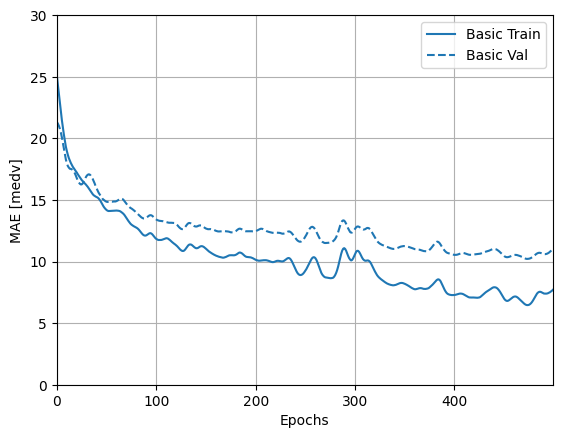

In [662]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 30])
plt.ylabel('MAE [medv]')

Text(0, 0.5, 'MSE [medv^2]')

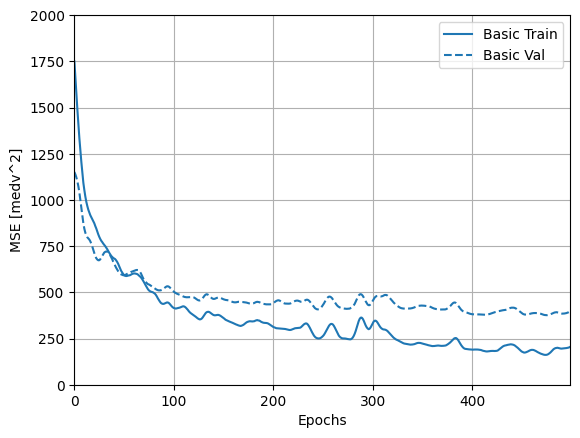

In [665]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 2000])
plt.ylabel('MSE [medv^2]')

In [654]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model.evaluate(normed_train_data, train_labels, verbose=2)

print("Train set Mean Abs Error    : {:5.2f} medv".format(mae))
print("Train set Mean Squared Error: {:5.2f} medv".format(mse))

Error Rate on Train Split: 
128/128 - 0s - loss: 258.0036 - mae: 9.2709 - mse: 258.0036 - mape: 18.1938 - 230ms/epoch - 2ms/step
Train set Mean Abs Error    :  9.27 medv
Train set Mean Squared Error: 258.00 medv


In [655]:
print('Error Rate on Evaluation Split: ')
loss, mae, mse, mape = model.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print("Validation set Mean Abs Error    : {:5.2f} medv".format(mae))
print("Validation set Mean Squared Error: {:5.2f} medv".format(mse))

Error Rate on Evaluation Split: 
43/43 - 0s - loss: 445.8934 - mae: 12.1003 - mse: 445.8934 - mape: 21.2216 - 88ms/epoch - 2ms/step
Validation set Mean Abs Error    : 12.10 medv
Validation set Mean Squared Error: 445.89 medv


In [656]:
print('Error Rate on Test Split: ')
loss, mae, mse, mape = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error    : {:5.2f} medv".format(mae))
print("Testing set Mean Squared Error: {:5.2f} medv".format(mse))

Error Rate on Test Split: 
43/43 - 0s - loss: 630.6678 - mae: 12.3714 - mse: 630.6678 - mape: 21.0856 - 87ms/epoch - 2ms/step
Testing set Mean Abs Error    : 12.37 medv
Testing set Mean Squared Error: 630.67 medv


128/128 [==============================] - 0s 2ms/step


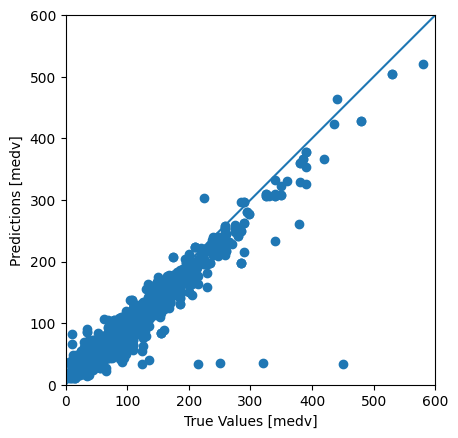

In [666]:
train_predictions = model.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [medv]')
plt.ylabel('Predictions [medv]')
lims = [0, 600]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

43/43 [==============================] - 0s 1ms/step


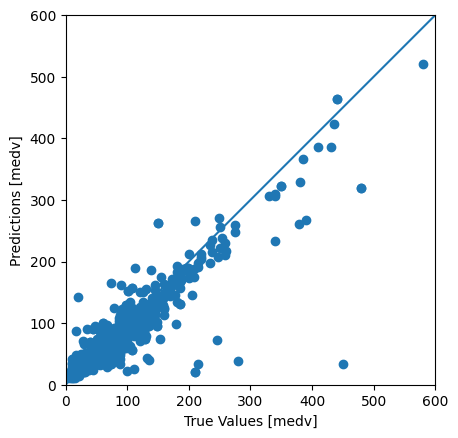

In [668]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [medv]')
plt.ylabel('Predictions [medv]')
lims = [0,600]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

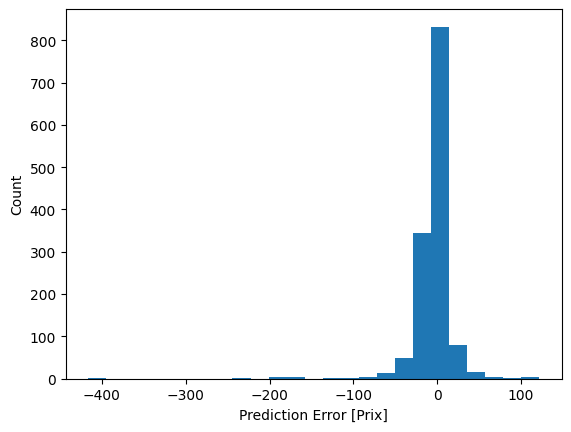

In [669]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Prix]")
_ = plt.ylabel("Count")